Title: 

   Using Physiochemical Elements to Predict Wine Quality

Introduction: 

   Wine is a complex beverage composed of numerous compounds that contribute to its overall quality and taste. It is viewed as a luxury good and it is enjoyed by many consumers all over the world. It In this data science project, we will be determining the most influential compounds within wine so that we can most accurately predict the  wine quality. 
      
   Through data analysis, we hope to find predictive relationships in certain compounds that make up wine in hopes of answering our project’s primary question: how accurately can we predict the quality of wine with the most relevant physicochemical elements using the K-nearest neighbors classification algorithm?
    
   We will use a 2009 “Wine Quality” dataset from Portugal which models several different red wines based on physicochemical tests and their quality from sensory data as a score between 0 and 10. Portugal is one of the top 10 countries that export wine, for which the wine industry is investing in technologies for wine making and selling. For this dataset, wine certification and quality assessment are key elements. While there are many components of wine in this dataset, the variables we will use are sulphates, chloride, density, pH values, and alcohol, and compare those to the overall quality to attempt to answer our project’s predictive question.
   

In [3]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [13]:
wine_quality <- read_csv2("https://raw.githubusercontent.com/choialice707/DSCI-100-Group56-Proj/main/winequality-red.csv")                                                                                                                                                                                                                     
wine_quality_filtered <- wine_quality |>
            mutate(quality = as_factor(quality)) |>
            filter(alcohol < 150) |>
            mutate(`volatile acidity` = as.numeric(`volatile acidity`),
                   `citric acid` = as.numeric(`citric acid`),
                   chlorides = as.numeric(chlorides),
                   density = as.numeric(density),
                   sulphates = as.numeric(sulphates))
                      
head(wine_quality_filtered)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5


In [14]:
wine_summary <- wine_quality |>
    group_by(quality) |>
    summarize(count_per_quality = n()) |>
    mutate(quality = as_factor(quality))
wine_summary

quality,count_per_quality
<fct>,<int>
3,10
4,53
5,681
6,638
7,199
8,18


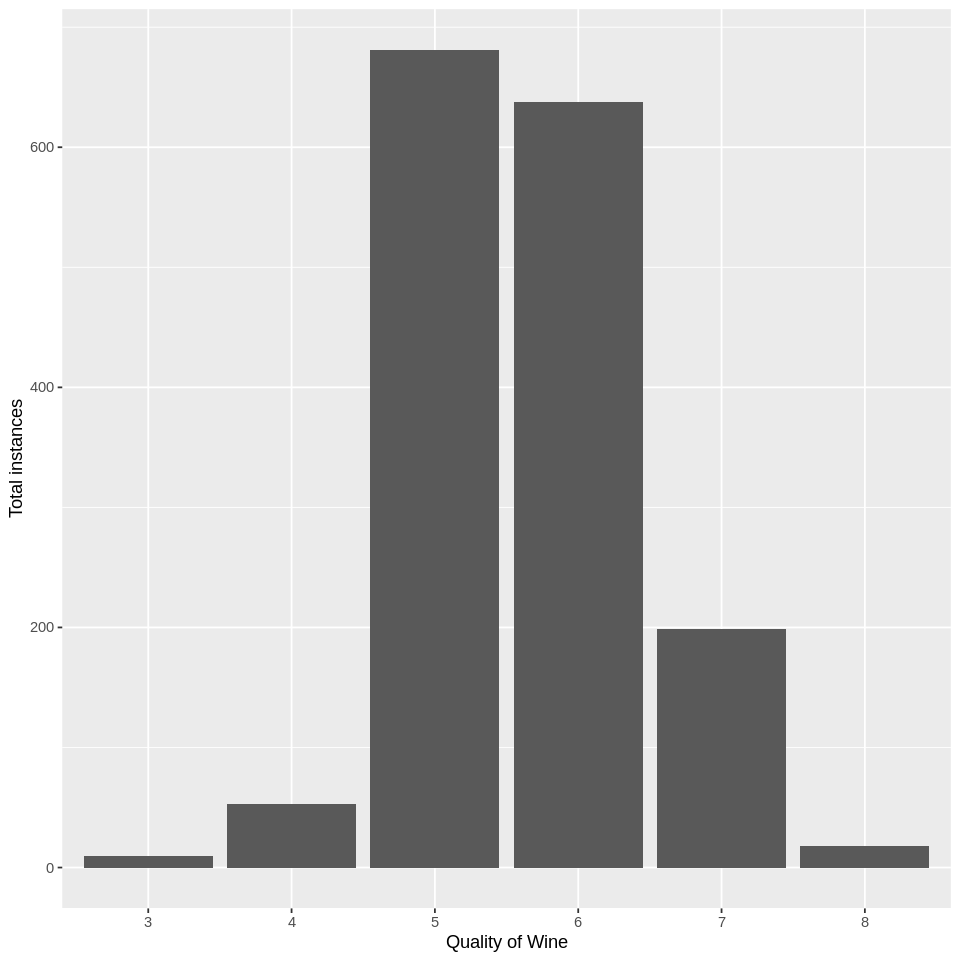

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_summary_plot <- wine_summary |>
    ggplot(aes(x = quality, y = count_per_quality)) +
    geom_bar(stat = "identity") +
    labs(x = "Quality of Wine", y = "Total instances")
    
wine_summary_plot

We chose to summarize and plot the total counts per wine quality because will give us a better understanding on the of likelihood of predicting each quality class. It will also give us some insight to how we should do the cross-validation, as well  

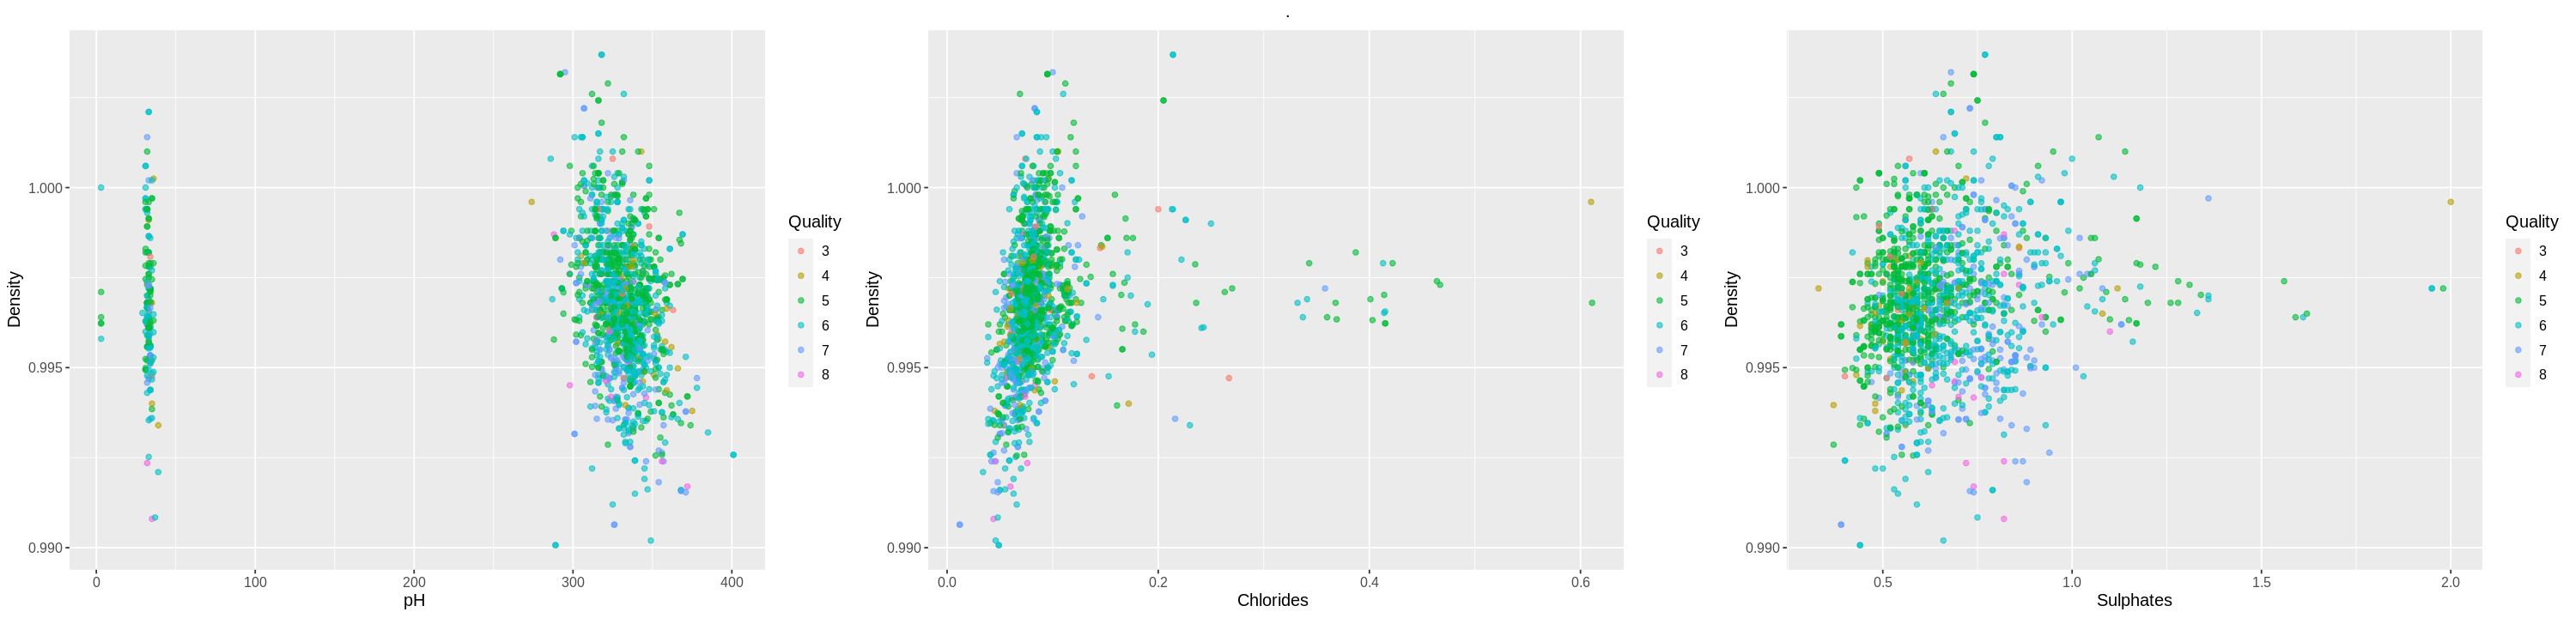

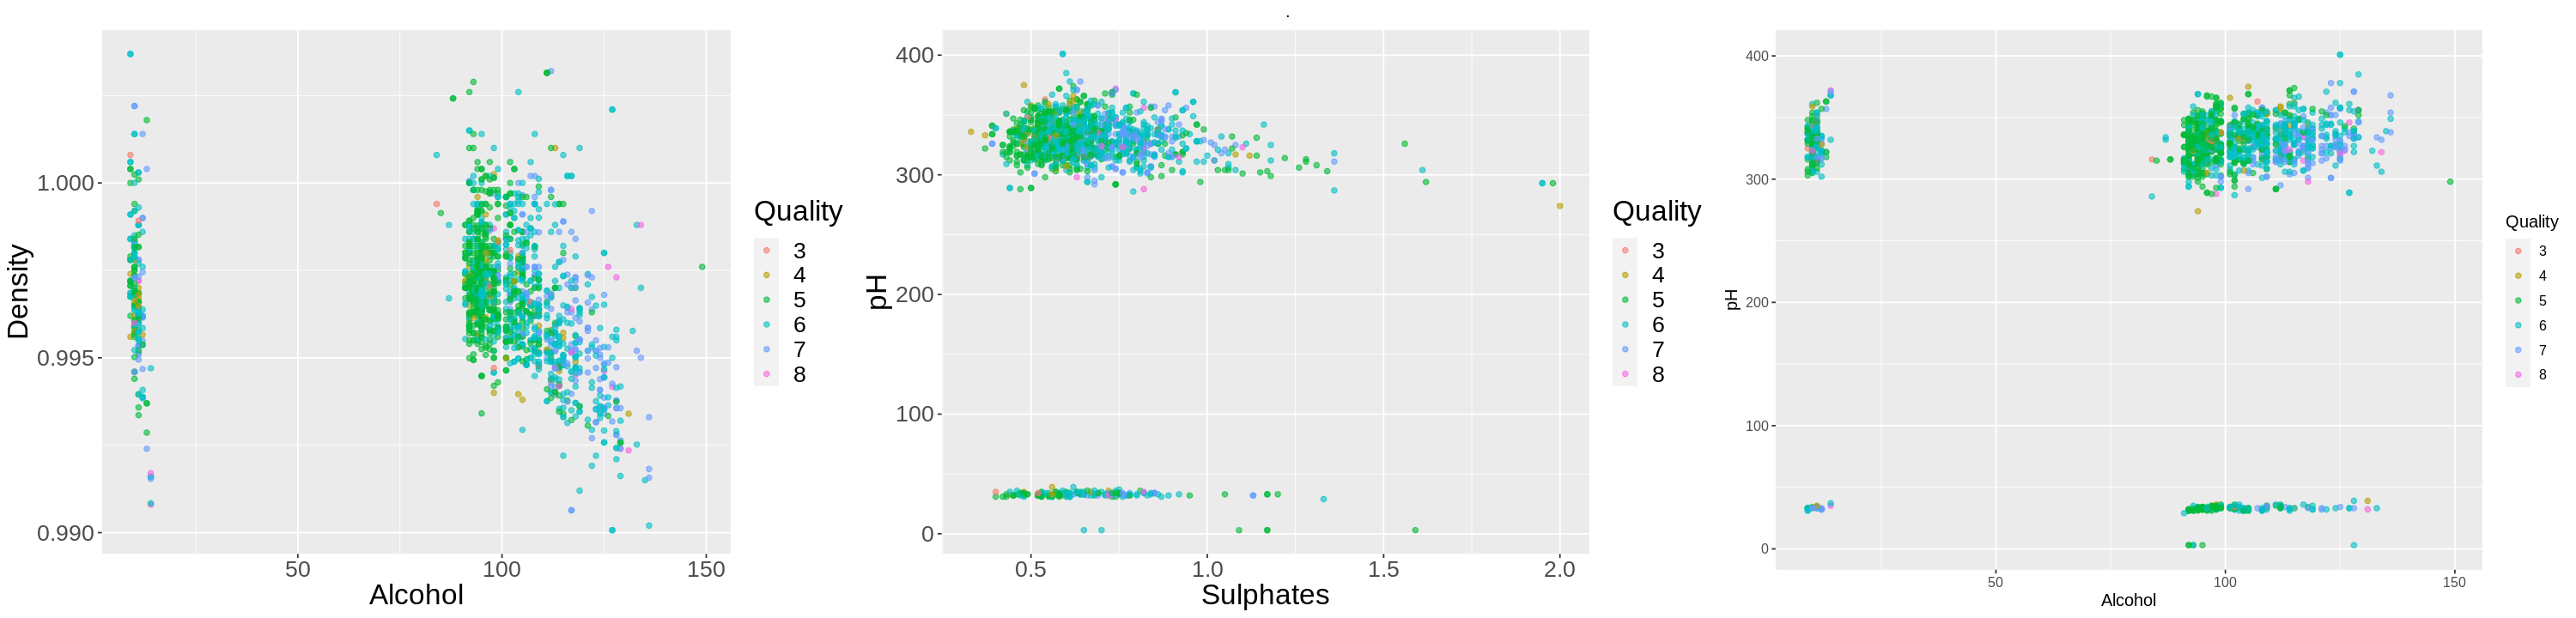

In [16]:
library(gridExtra)
options(repr.plot.width = 25, repr.plot.height = 6) 

wine_plot1 <- wine_quality_filtered |>
  ggplot(aes(x = pH, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "pH ", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot2 <- wine_quality_filtered |>
  ggplot(aes(x = chlorides, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Chlorides ", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot3 <- wine_quality_filtered |>
  ggplot(aes(x = sulphates, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot4 <- wine_quality_filtered |>
  ggplot(aes(x = alcohol, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 20))

wine_plot5 <- wine_quality_filtered |>
  ggplot(aes(x = sulphates, y = pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 20))

wine_plot6 <- wine_quality_filtered |>
  ggplot(aes(x = alcohol, y = pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 12))

grid.arrange(wine_plot1, wine_plot2, wine_plot3, nrow = 1, top = '.')
grid.arrange(wine_plot4, wine_plot5, wine_plot6, nrow = 1, top = '.')
     

Methods:

We will be conducting our data analysis using the K-nearest neighbors classification algorithm. For now, after plotting various columns in relation with each other, we decided we will use the predictive variables: density,alcohol, pH, chlorides and sulphates in the prediction model. During the course of our project however, we will be aiming to use both or one of cross-validation and forward selection to pick the most relevant variables in our prediction.
For our final visualization of our results, we will create a plot that compares the accuracies of our model during the process of refining it to result in the best possible accuracy and prediction model.

Expected Outcome and Significance:

In creating these graphs, we hope to find out about how accurately we can predict the quality of wine depending on the physicochemical properties density,alcohol, ph value, chloride and sulphate values, and how they affect the overall quality of red wine. Being able to effectively predict the quality using these predictive variables would allow for us to evaluate the significance of each variable and how it affects the quality. Additionally if we are able to successfully predict the quality values with a high accuracy, one can use measurements of these variables of various different types of red wine to predict the quality of wine as well as create wines with values that will result in a high quality classification. Thus, this data analysis would provide guidance in future wine brewing business, marketing,and quality control. It assists the winemakers in creating more precise tastes of wines of higher quality, aiming at consumers' preferences. In addition, customers with this knowledge will be able to appreciate and understand the art wine brewing. The future questions that this data analysis may raise is what other factors of red wine other than the predictive variables that are unknown could contribute to quality and be added in the prediction model to more accurately predict quality, as well as predictive variables that result from producing wine in a sustainable and eco-friendly way (differentiating it from normally produced wine).